# Task 1


## Data Manipulation of the data scraped from Skytrax

<h1> IMPORTING ESSENTIAL LIBERARIES </h1>

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import re

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

#sets the default autosave frequency in seconds
%autosave 60

%matplotlib inline

Autosaving every 60 seconds


In [2]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.probability import FreqDist
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

In [4]:
!pip install spacy
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from spacy.tokenizer import Tokenizer
from spacy.lexeme import Lexeme

In [5]:
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [6]:
!pip install textblob
import textblob
from textblob import TextBlob

In [7]:
!pip install pycaret 
from pycaret.nlp import *

In [8]:
random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

<h1>IMPORT DATA (Using Pandas)</h1>

In [9]:
df = pd.read_csv("BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | Worst experience ever. Outbound...
1,1,✅ Trip Verified | Check in was a shambles at ...
2,2,✅ Trip Verified | Beyond disgusted with the fa...
3,3,✅ Trip Verified | On July 19th 2022 I had subm...
4,4,✅ Trip Verified | I booked the flight on Oct ...


In [10]:
df.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [11]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

<h1> DATA ANALYSIS</h1>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [13]:
df.describe(include='all')

,reviews
count,1000
unique,1000
top,Not Verified | Worst experience ever. Outbound...
freq,1


In [14]:
df["word_count"] = df["reviews"].apply(lambda x: len(str(x).split()))

In [15]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [16]:
df["char_count"] = df["reviews"].apply(lambda x: char_counts(str(x)))

In [17]:
df["avg_word_len"] = df["char_count"]/df["word_count"]

In [18]:
df["stop_words_len"] = df["reviews"].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [19]:
df["numerics_count"] = df["reviews"].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [20]:
df["uppercase_count"] = df["reviews"].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [21]:
df["titlecase_count"] = df["reviews"].apply(lambda x: len([t for t in x.split() if t.istitle()]))

In [22]:
df.head()

,reviews,word_count,char_count,avg_word_len,stop_words_len,numerics_count,uppercase_count,titlecase_count
0,Not Verified | Worst experience ever. Outbound...,55,250,4.55,20,1,3,12
1,✅ Trip Verified | Check in was a shambles at ...,182,769,4.23,91,1,7,16
2,✅ Trip Verified | Beyond disgusted with the fa...,78,356,4.56,35,1,2,7
3,✅ Trip Verified | On July 19th 2022 I had subm...,99,455,4.60,38,4,6,12
4,✅ Trip Verified | I booked the flight on Oct ...,184,823,4.47,82,1,12,21


In [23]:
df.describe()

,word_count,char_count,avg_word_len,stop_words_len,numerics_count,uppercase_count,titlecase_count
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,149.72,670.00,4.52,67.22,1.28,5.29,18.20
std,99.82,437.44,0.30,49.54,1.73,5.23,10.18
min,27.00,118.00,3.67,5.00,0.00,0.00,3.00
25%,80.00,363.00,4.32,34.00,0.00,2.00,11.00
50%,124.00,556.50,4.50,55.00,1.00,4.00,16.00
75%,189.00,832.25,4.69,87.25,2.00,7.00,22.00
max,658.00,2877.00,5.84,354.00,13.00,36.00,78.00


<h1>Clean Data</h1>

In [24]:
df2 = df[["reviews"]]
df2.head()

,reviews
0,Not Verified | Worst experience ever. Outbound...
1,✅ Trip Verified | Check in was a shambles at ...
2,✅ Trip Verified | Beyond disgusted with the fa...
3,✅ Trip Verified | On July 19th 2022 I had subm...
4,✅ Trip Verified | I booked the flight on Oct ...


In [25]:
#lowercase Conversion
df2["reviews"] = df2["reviews"].apply(lambda x: str(x).lower())
df2

C:\Users\samid\AppData\Local\Temp\ipykernel_10600\1634770724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["reviews"] = df2["reviews"].apply(lambda x: str(x).lower())


,reviews
0,not verified | worst experience ever. outbound...
1,✅ trip verified | check in was a shambles at ...
2,✅ trip verified | beyond disgusted with the fa...
3,✅ trip verified | on july 19th 2022 i had subm...
4,✅ trip verified | i booked the flight on oct ...
...,...
995,✅ trip verified | singapore to heathrow. i ski...
996,✅ trip verified | chicago to chennai via lond...
997,✅ trip verified | flew london heathrow to toro...
998,✅ trip verified | i flew british airways from ...


In [26]:
#Remove Special Characters from a String
df2["reviews"] = df2["reviews"].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]',"", x))
df2

C:\Users\samid\AppData\Local\Temp\ipykernel_10600\2477286499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["reviews"] = df2["reviews"].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]',"", x))


,reviews
0,not verified worst experience ever outbound f...
1,trip verified check in was a shambles at bw...
2,trip verified beyond disgusted with the fact...
3,trip verified on july 19th 2022 i had submit...
4,trip verified i booked the flight on oct 8 ...
...,...
995,trip verified singapore to heathrow i skippe...
996,trip verified chicago to chennai via london...
997,trip verified flew london heathrow to toront...
998,trip verified i flew british airways from he...


In [27]:
#Remove Digits from a String
df2["reviews"] = df2["reviews"].apply(lambda x: re.sub(r'[0-9]',"", x))
df2

C:\Users\samid\AppData\Local\Temp\ipykernel_10600\4224649115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["reviews"] = df2["reviews"].apply(lambda x: re.sub(r'[0-9]',"", x))


,reviews
0,not verified worst experience ever outbound f...
1,trip verified check in was a shambles at bw...
2,trip verified beyond disgusted with the fact...
3,trip verified on july th i had submitted a ...
4,trip verified i booked the flight on oct b...
...,...
995,trip verified singapore to heathrow i skippe...
996,trip verified chicago to chennai via london...
997,trip verified flew london heathrow to toront...
998,trip verified i flew british airways from he...


In [28]:
#Remove Multiple Spaces
df2["reviews"] = df2["reviews"].apply(lambda x: ' '.join(x.split()))
df2

C:\Users\samid\AppData\Local\Temp\ipykernel_10600\2298189964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["reviews"] = df2["reviews"].apply(lambda x: ' '.join(x.split()))


,reviews
0,not verified worst experience ever outbound fl...
1,trip verified check in was a shambles at bwi j...
2,trip verified beyond disgusted with the fact t...
3,trip verified on july th i had submitted a com...
4,trip verified i booked the flight on oct but h...
...,...
995,trip verified singapore to heathrow i skipped ...
996,trip verified chicago to chennai via london th...
997,trip verified flew london heathrow to toronto ...
998,trip verified i flew british airways from heat...


In [29]:
#Remove Stop Words
df2["no_stopwords"] = df2["reviews"].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))
df2.head()

C:\Users\samid\AppData\Local\Temp\ipykernel_10600\2994854474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["no_stopwords"] = df2["reviews"].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))


,reviews,no_stopwords
0,not verified worst experience ever outbound fl...,verified worst experience outbound flight canc...
1,trip verified check in was a shambles at bwi j...,trip verified check shambles bwi counters open...
2,trip verified beyond disgusted with the fact t...,trip verified disgusted fact baggage delivered...
3,trip verified on july th i had submitted a com...,trip verified july th submitted complaint form...
4,trip verified i booked the flight on oct but h...,trip verified booked flight oct cancel flight ...


In [30]:
#WordCloud
text = ' '.join(df2["no_stopwords"])
text

'verified worst experience outbound flight cancelled notified rebooked uncomfortable trip inbound flight delayed hour notified boarded hand luggage bag extra wait milan food horrible trip verified check shambles bwi counters open flight bag drop queue longer regular checkin queue boarding zones carried reasonably board fas fine engaging outbound flight iad aircraft cramped seats economy horrible seated aisle seat row f entertainment box taking legroom overall cramped seat poor legroom awful ife screens meal mediocre bar service meal time lading served hot sandwich oozing cheese wrapper pleasant handle tasted good plane landed remote stand meant bussed t raining nice experience overall rate mediocre journey trip verified disgusted fact baggage delivered weeks emails calls ba pieces reported th september ba responses generic non specific attempts speak customer service worker obstructed airline touting values claiming yo best world disgraceful fully describe customer service trip verifie

In [31]:
wc = WordCloud(width=400, height=330, max_words=100, background_color="white").generate(text)

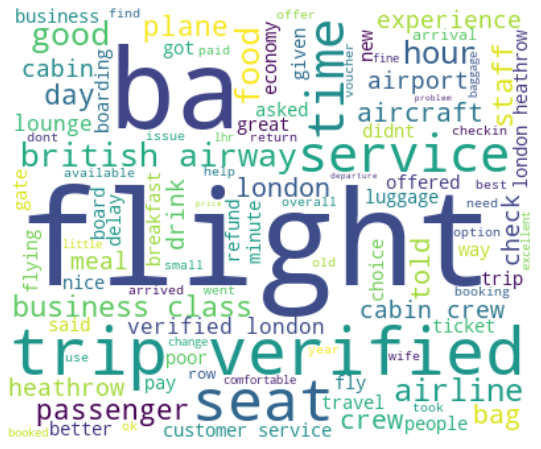

In [32]:
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
df.to_csv("cleaned.csv", index=False)